# Universidad del Valle de Guatemala
## Facultad de Ingeniería
### Departamento de Computación

---

# Proyecto 2: Análisis Exploratorio
### Reto 04: Predicción de compradores recurrentes: cuestionar la línea base - Negocios

**Integrantes:**
- Diego Alexander Hernández Silvestre, 21270
- Linda Inés Jiménez Vides, 21169
- Mario Antonio Guerra Morales, 21008
- David Jonathan Aragon Vasquez, 21053

**Curso:** Data Science  
**Sección:** 10  
**Grupo** 4  

---

Guatemala, 30 de septiembre de 2024


##### 🫳 Para la descarga del dataset de este reto, es necesario la creación de una cuenta dentro de Alibaba Cloud. Para facilitar este proceso se proporcionan los elementos a descargar en estos enlaces:
- Data_Format1: https://drive.google.com/file/d/1jgsaSM0wypPMUWaNlXy5s_kO0uiXNzES/view?usp=sharing
- Data_Format2: https://drive.google.com/file/d/1dnMeaon-ovASN2HEI1WSNfnw-7lyINAh/view?usp=drivesdk
- sample_submission.csv: 

#### 📑 Descripción del dataset

A continuación se describen las variables del dataset utilizadas para el análisis exploratorio:

- `user_id`: Identificador único para el comprador tipo numérica.
- `age_range`: Rango de edad del usuario donde:
    - 1 < 18
    - 2 para el rango [18, 24]
    - 3 para el rango [25, 29]
    - 4 para el rango [30, 34]
    - 5 para el rango [35, 39]
    - 6 para el rango [40, 49]
    - 7 y 8 para >= 50
    - 0 y NULL para desconocido
- `gender`: Género del usuario donde:
    - 0 es femenino
    - 1 es masculino
    - 2 y Null para desconocido
- `merchant_id`: Identificador único para el comerciante.

- `label`: Valores entre -1 y 1 donde:
    - 1 indica que `user_id` es un comprador recurrente de `merchant_id`
    - 0 es lo contrario a 1
    - -1 indica que `user_id` no es un nuevo cliente de `merchant_id`
    - Null se encuentra en los datos de prueba indicando que son para predecir.
- `activity_log`: Conjunto de registroos de interacción entre {**user_id**, **merchant_id**}, donde cada registro es una acción representada como ***item_id:category_id:brand_id:time_stamp:action_type***. Los elementos se separan con #
-  `item_id`: Identificador único para el artículo.
- `category_id`: Indentificador único para la categoría a la que pertenece el artículo
- `brand_id` Identificador único para la marca del artículo
- `time_stamp`: Fecha que ocurrió la acción
- `action_type`: Tipo de acción enumerado de 0 a 3 donde:
    - 0 es para clic
    - 1 es para agregar al carrito
    - 2 es para compra
    - 3 es paea agregar a favoritos

In [22]:
import os
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import matplotlib.ticker as ticker

### 📩 Inciso 1. Descomprimir los datasets.

In [5]:
def unzipFile(zip_path):
    
    # Extraer en una carpeta con el mismo nombre que el archivo ZIP
    extract_to = os.path.splitext(zip_path)[0]
    
    # Verificar si la carpeta ya existe
    if os.path.exists(extract_to):
        print(f"La carpeta {extract_to} ya existe. No se descomprimirá el archivo.")
        return
    
    # Descomprimir el archivo
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    
    print(f"Archivo descomprimido en {extract_to}")

unzipFile('data/data_format1.zip')
unzipFile('data/data_format2.zip')

Archivo descomprimido en data/data_format1
Archivo descomprimido en data/data_format2


El reto cuenta con dos formatos de datasets, el formato 1 según sus propias instrucciones es más amigable para la ingeniería de características pero la información se encuentra en varios archivos. En cambio, el formato 2 es el que proporcionan como el dataset de entrenamiento y pruebas por defecto. Para el análisis inicial se utilizará el formato 2. 

### 📩 Inciso 2. Carga de los datos

In [9]:
dataTest = pd.read_csv('data/data_format1/data_format1/train_format1.csv')
dataTrain = pd.read_csv('data/data_format2/data_format2/train_format2.csv')

### 🧹 Inciso 3. Preprocesamiento y limpieza de datos

In [7]:
dataTrain.head()

,user_id,age_range,gender,merchant_id,label,activity_log
0,34176,6.0,0.0,944,-1,408895:1505:7370:1107:0
1,34176,6.0,0.0,412,-1,17235:1604:4396:0818:0#954723:1604:4396:0818:0...
2,34176,6.0,0.0,1945,-1,231901:662:2758:0818:0#231901:662:2758:0818:0#...
3,34176,6.0,0.0,4752,-1,174142:821:6938:1027:0
4,34176,6.0,0.0,643,-1,716371:1505:968:1024:3


In [8]:
dataTrain.info()
dataTrain.count()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7030723 entries, 0 to 7030722
Data columns (total 6 columns):
 #   Column        Dtype  
---  ------        -----  
 0   user_id       int64  
 1   age_range     float64
 2   gender        float64
 3   merchant_id   int64  
 4   label         int64  
 5   activity_log  object 
dtypes: float64(2), int64(3), object(1)
memory usage: 321.8+ MB


user_id         7030723
age_range       7011343
gender          6969011
merchant_id     7030723
label           7030723
activity_log    7027748
dtype: int64

In [9]:
dataTrain.describe()

,user_id,age_range,gender,merchant_id,label
count,7.030723e+06,7.011343e+06,6.969011e+06,7.030723e+06,7.030723e+06
mean,2.120120e+05,3.106246e+00,3.036947e-01,2.455233e+03,-9.606277e-01
std,1.223200e+05,1.914345e+00,5.319517e-01,1.456245e+03,2.058154e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,-1.000000e+00
25%,1.055770e+05,2.000000e+00,0.000000e+00,1.176000e+03,-1.000000e+00
50%,2.126810e+05,3.000000e+00,0.000000e+00,2.404000e+03,-1.000000e+00
75%,3.175440e+05,4.000000e+00,1.000000e+00,3.743000e+03,-1.000000e+00
max,4.241700e+05,8.000000e+00,2.000000e+00,4.995000e+03,1.000000e+00


In [10]:
# Revisar si hay valores faltantes
print("Valores faltantes por columna:")
print(dataTrain.isnull().sum())

# Eliminar filas con valores faltantes
dataTrain_clean = dataTrain.dropna()

# Revisar duplicados
print(f"Duplicados en el dataset: {dataTrain.duplicated().sum()}")

# Eliminar filas duplicadas
dataTrain_clean = dataTrain.drop_duplicates()


Valores faltantes por columna:
user_id             0
age_range       19380
gender          61712
merchant_id         0
label               0
activity_log     2975
dtype: int64
Duplicados en el dataset: 0


In [11]:
# Procesamiento de cada fila de activity_log
def process_activity_log(row):
    row = str(row)
    
    # Separar las interacciones por '#'
    interactions = row.split('#')
    
    # Listas para almacenar los valores de las cinco columnas
    item_ids = []
    category_ids = []
    brand_ids = []
    time_stamps = []
    action_types = []
    
    # Procesar cada interacción
    for interaction in interactions:
        # Separar por ':'
        values = interaction.split(':')
        if len(values) == 5:
            item_ids.append(values[0])
            category_ids.append(values[1])
            brand_ids.append(values[2])
            time_stamps.append(values[3])
            action_types.append(values[4])
    
    # Devolver los valores separados por comas
    return pd.Series({
        'item_id': ','.join(item_ids),
        'category_id': ','.join(category_ids),
        'brand_id': ','.join(brand_ids),
        'time_stamp': ','.join(time_stamps),
        'action_type': ','.join(action_types)
    })

def process_in_chunks(df, chunk_size=10000):

    # Creacion de DataFrame vacío para almacenar los resultados
    result_df = pd.DataFrame()
    
    for start in range(0, df.shape[0], chunk_size):
        end = start + chunk_size
        print(f"Procesando filas de {start} a {end}...")
        
        # Obtener un chunk del DataFrame original
        chunk = df.iloc[start:end]
        
        # Aplicar la función process_activity_log al chunk
        processed_chunk = chunk['activity_log'].apply(process_activity_log)
        
        # Concatenar el chunk procesado con el chunk original
        chunk_with_data = pd.concat([chunk, processed_chunk], axis=1)
        
        # Agregar el chunk procesado al DataFrame final
        result_df = pd.concat([result_df, chunk_with_data])
    
    return result_df

dataTrain_activity_clean = process_in_chunks(dataTrain_clean, chunk_size=10000)

dataTrain_activity_clean.head()


Procesando filas de 0 a 10000...
Procesando filas de 10000 a 20000...
Procesando filas de 20000 a 30000...
Procesando filas de 30000 a 40000...
Procesando filas de 40000 a 50000...
Procesando filas de 50000 a 60000...
Procesando filas de 60000 a 70000...
Procesando filas de 70000 a 80000...
Procesando filas de 80000 a 90000...
Procesando filas de 90000 a 100000...
Procesando filas de 100000 a 110000...
Procesando filas de 110000 a 120000...
Procesando filas de 120000 a 130000...
Procesando filas de 130000 a 140000...
Procesando filas de 140000 a 150000...
Procesando filas de 150000 a 160000...
Procesando filas de 160000 a 170000...
Procesando filas de 170000 a 180000...
Procesando filas de 180000 a 190000...
Procesando filas de 190000 a 200000...
Procesando filas de 200000 a 210000...
Procesando filas de 210000 a 220000...
Procesando filas de 220000 a 230000...
Procesando filas de 230000 a 240000...
Procesando filas de 240000 a 250000...
Procesando filas de 250000 a 260000...
Procesand

,user_id,age_range,gender,merchant_id,label,activity_log,item_id,category_id,brand_id,time_stamp,action_type
0,34176,6.0,0.0,944,-1,408895:1505:7370:1107:0,408895,1505,7370,1107,0
1,34176,6.0,0.0,412,-1,17235:1604:4396:0818:0#954723:1604:4396:0818:0...,"17235,954723,275437,548906,368206,480007,95472...","1604,1604,1604,1577,662,1604,1604,1505","4396,4396,4396,4396,4396,4396,4396,4396","0818,0818,0818,1031,0818,0818,0818,1024","0,0,0,0,0,0,0,0"
2,34176,6.0,0.0,1945,-1,231901:662:2758:0818:0#231901:662:2758:0818:0#...,"231901,231901,108465,231901,231901,840446,231901","662,662,662,662,662,1142,662","2758,2758,2758,2758,2758,2758,2758","0818,0818,0820,0820,0820,0820,0819","0,0,0,0,0,0,0"
3,34176,6.0,0.0,4752,-1,174142:821:6938:1027:0,174142,821,6938,1027,0
4,34176,6.0,0.0,643,-1,716371:1505:968:1024:3,716371,1505,968,1024,3


In [18]:
dataTrain_activity_clean = pd.read_csv("data/train_cleaned_data.csv")

dataTrain_activity_clean[['action_type', 'item_id']].head(20)

,action_type,item_id
0,0,408895
1,"0,0,0,0,0,0,0,0","17235,954723,275437,548906,368206,480007,95472..."
2,"0,0,0,0,0,0,0","231901,231901,108465,231901,231901,840446,231901"
3,0,174142
4,3,716371
5,0,996061
6,"0,0,0,3,3,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,...","757713,757713,757713,718096,757713,613698,7577..."
7,3,951186
8,0,801430
9,"0,0,0,0,0","209509,699235,915857,209509,699235"


In [20]:
action_dict = {0: 'clicks', 1: 'add_to_cart', 2: 'purchases', 3: 'add_to_favorites'}

def process_row(row):
    if isinstance(row['action_type'], str):
        actions = list(map(int, row['action_type'].split(',')))
    else:
        actions = []  
    
    if isinstance(row['item_id'], str):
        items = row['item_id'].split(',')
    else:
        items = []  

    action_counts = {'clicks': 0, 'add_to_cart': 0, 'purchases': 0, 'add_to_favorites': 0}
    
    for action in actions:
        action_name = action_dict[action]
        action_counts[action_name] += 1
    
    total_actions = len(actions)
    
    return pd.Series({**action_counts, 'total_actions': total_actions})

dataTrain_activity_clean[['clicks', 'add_to_cart', 'purchases', 'add_to_favorites', 'total_actions']] = dataTrain_activity_clean.apply(process_row, axis=1)
print(dataTrain_activity_clean[['action_type', 'item_id', 'clicks', 'add_to_cart', 'purchases', 'add_to_favorites', 'total_actions']].head(20))


                                          action_type  \
0                                                   0   
1                                     0,0,0,0,0,0,0,0   
2                                       0,0,0,0,0,0,0   
3                                                   0   
4                                                   3   
5                                                   0   
6   0,0,0,3,3,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,...   
7                                                   3   
8                                                   0   
9                                           0,0,0,0,0   
10                                                0,0   
11                                                  0   
12                                                0,0   
13                                                0,0   
14                                                  0   
15                                                  0   
16                             

In [22]:
def count_unique_items(row):
    if isinstance(row['item_id'], str):
        items = row['item_id'].split(',')
        return len(set(items))  
    return 0  

dataTrain_activity_clean['unique_item_count'] = dataTrain_activity_clean.apply(count_unique_items, axis=1)



                                          action_type  \
0                                                   0   
1                                     0,0,0,0,0,0,0,0   
2                                       0,0,0,0,0,0,0   
3                                                   0   
4                                                   3   
5                                                   0   
6   0,0,0,3,3,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,...   
7                                                   3   
8                                                   0   
9                                           0,0,0,0,0   
10                                                0,0   
11                                                  0   
12                                                0,0   
13                                                0,0   
14                                                  0   
15                                                  0   
16                             

In [24]:
dataTrain_activity_clean['time_stamp']

0                                                       1107
1                    0818,0818,0818,1031,0818,0818,0818,1024
2                         0818,0818,0820,0820,0820,0820,0819
3                                                       1027
4                                                       1024
                                 ...                        
7030718                                            0516,0524
7030719                                       1014,1014,1014
7030720                                       1016,1016,1016
7030721    1111,1111,1111,1110,1110,1110,1110,1110,1110,1...
7030722                                  1111,1111,1018,1018
Name: time_stamp, Length: 7030723, dtype: object

In [25]:
dataTrain_activity_clean.to_csv("data/train_cleaned_data.csv")

## 📈 Análisis Exploratorio

In [8]:
dataTrain_activity_clean = pd.read_csv("data/train_cleaned_data.csv")

Al cargar el dataset con los datos limpios, se procedió a realizarse el análisis exploratorio. Primero, se cuentan la cantidad de columnas con las cuales se cuentan actualmente en el dataframe que son de utilidad. Luego, se enfocó en las variables cualitativas para realizar este proceso.

In [14]:
num_columns = dataTrain_activity_clean.shape[1]-1 # Se elimina la primera columna, que es un índice para la cantidad de filas.

print(f"El DataFrame tiene un total de {num_columns} columnas.")

El DataFrame tiene un total de 18 columnas.


In [30]:
categorical_columns = dataTrain_activity_clean[["user_id", "age_range", "gender", "merchant_id", "label"]]

# Generar tablas de frecuencia para cada variable categórica
for col in categorical_columns.columns:
    frequency_table = dataTrain_activity_clean[col].value_counts().nlargest(10).reset_index()
    frequency_table.columns = [col, 'frequency']  
    
    frequency_table['percentage'] = (frequency_table['frequency'] / frequency_table['frequency'].sum()) * 100

    print(f"Frecuencia de valores en la columna {col} (Top 10):\n")
    print(tabulate(frequency_table, headers='keys', tablefmt='rounded_grid', showindex=False))
    print("\n")


Frecuencia de valores en la columna user_id (Top 10):

╭───────────┬─────────────┬──────────────╮
│   user_id │   frequency │   percentage │
├───────────┼─────────────┼──────────────┤
│    131476 │        1049 │     13.324   │
├───────────┼─────────────┼──────────────┤
│    185538 │         828 │     10.517   │
├───────────┼─────────────┼──────────────┤
│    181513 │         812 │     10.3137  │
├───────────┼─────────────┼──────────────┤
│    306686 │         777 │      9.86917 │
├───────────┼─────────────┼──────────────┤
│    383810 │         769 │      9.76756 │
├───────────┼─────────────┼──────────────┤
│     70625 │         747 │      9.48812 │
├───────────┼─────────────┼──────────────┤
│    217644 │         745 │      9.46272 │
├───────────┼─────────────┼──────────────┤
│     92057 │         735 │      9.3357  │
├───────────┼─────────────┼──────────────┤
│    220326 │         711 │      9.03086 │
├───────────┼─────────────┼──────────────┤
│    264205 │         700 │      8.89115 │

In [4]:


# Función para descomponer una columna con valores separados por comas
def explode_column(df, column_name):
    df[column_name] = df[column_name].str.split(',')
    exploded_df = df.explode(column_name)
    return exploded_df

columns_to_explode = ["item_id", "category_id", "brand_id", "time_stamp", "action_type"]

frequency_tables = {col: pd.DataFrame() for col in columns_to_explode}

# Leer el archivo CSV en fragmentos
chunksize = 100000  # Ajusta este tamaño según la memoria disponible
for chunk in pd.read_csv("data/train_cleaned_data.csv", chunksize=chunksize):
    for col in columns_to_explode:
        # Descomponer la columna en filas individuales
        exploded_df = explode_column(chunk.copy(), col)
        
        # Calcular la tabla de frecuencia
        frequency_table = exploded_df[col].value_counts().nlargest(10).reset_index()
        frequency_table.columns = [col, 'frequency']
        
        # Calcular el porcentaje
        frequency_table['percentage'] = (frequency_table['frequency'] / frequency_table['frequency'].sum()) * 100
        
        # Agregar los resultados a la tabla correspondiente en el diccionario
        frequency_tables[col] = pd.concat([frequency_tables[col], frequency_table], ignore_index=True)

# Imprimir las tablas finales utilizando tabulate
for col in columns_to_explode:
    final_table = frequency_tables[col].groupby(col, as_index=False).agg({'frequency': 'sum'})
    final_table['percentage'] = (final_table['frequency'] / final_table['frequency'].sum()) * 100
    
    print(f"Tabla de frecuencia consolidada para {col} (Top 10):\n")
    print(tabulate(final_table.nlargest(10, 'frequency'), headers='keys', tablefmt='rounded_grid', showindex=False))
    print("\n")


Tabla de frecuencia consolidada para item_id (Top 10):

╭───────────┬─────────────┬──────────────╮
│   item_id │   frequency │   percentage │
├───────────┼─────────────┼──────────────┤
│     67897 │      162659 │     35.6475  │
├───────────┼─────────────┼──────────────┤
│    783997 │       91219 │     19.9911  │
├───────────┼─────────────┼──────────────┤
│    636863 │       34756 │      7.61694 │
├───────────┼─────────────┼──────────────┤
│    631714 │       21147 │      4.63446 │
├───────────┼─────────────┼──────────────┤
│     61518 │       15133 │      3.31647 │
├───────────┼─────────────┼──────────────┤
│    559967 │       12388 │      2.71489 │
├───────────┼─────────────┼──────────────┤
│    770668 │        9420 │      2.06444 │
├───────────┼─────────────┼──────────────┤
│    628774 │        5952 │      1.30441 │
├───────────┼─────────────┼──────────────┤
│   1024557 │        5852 │      1.28249 │
├───────────┼─────────────┼──────────────┤
│    269715 │        4934 │      1.08131 

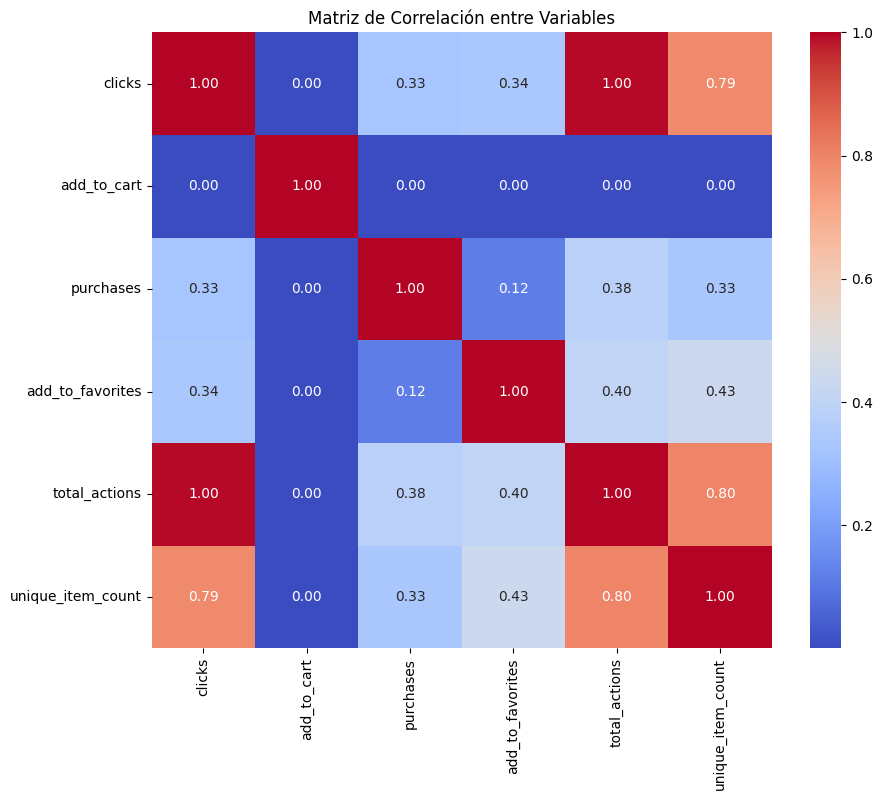

In [13]:
num_cols = ['clicks', 'add_to_cart', 'purchases', 'add_to_favorites', 'total_actions', 'unique_item_count']

# Convertir las columnas de valores separados por comas a valores numéricos tomando el primer valor
for col in ['item_id', 'category_id', 'brand_id', 'action_type']:
    dataTrain_activity_clean[col] = dataTrain_activity_clean[col].apply(lambda x: int(x.split(',')[0]) if isinstance(x, str) else x)

correlation_matrix = dataTrain_activity_clean[num_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación entre Variables')
plt.show()

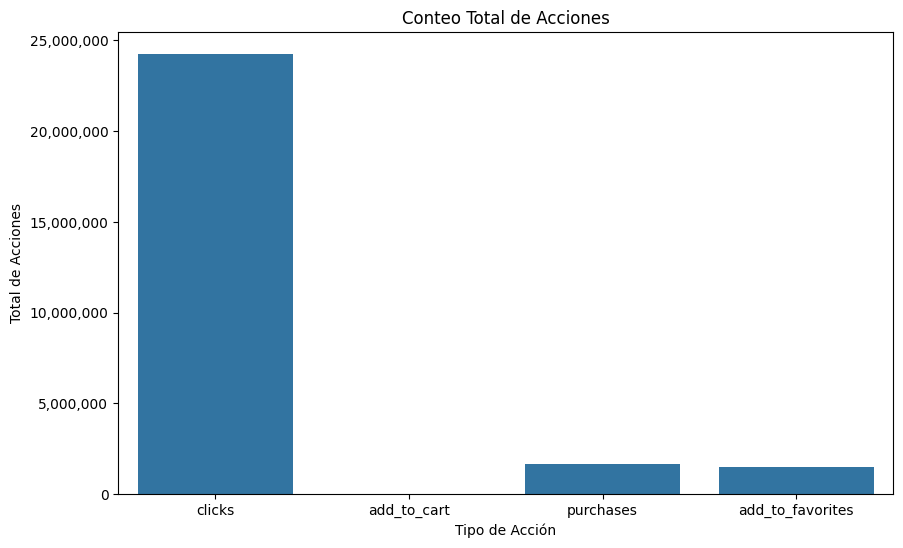

In [23]:
plt.figure(figsize=(10, 6))
action_counts = dataTrain_activity_clean[['clicks', 'add_to_cart', 'purchases', 'add_to_favorites']].sum()

# Crear la gráfica de barras
sns.barplot(x=action_counts.index, y=action_counts.values)

# Ajustar el título y las etiquetas
plt.title('Conteo Total de Acciones')
plt.xlabel('Tipo de Acción')
plt.ylabel('Total de Acciones')

# Formatear el eje Y para que no muestre notación científica
plt.gca().yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.show()

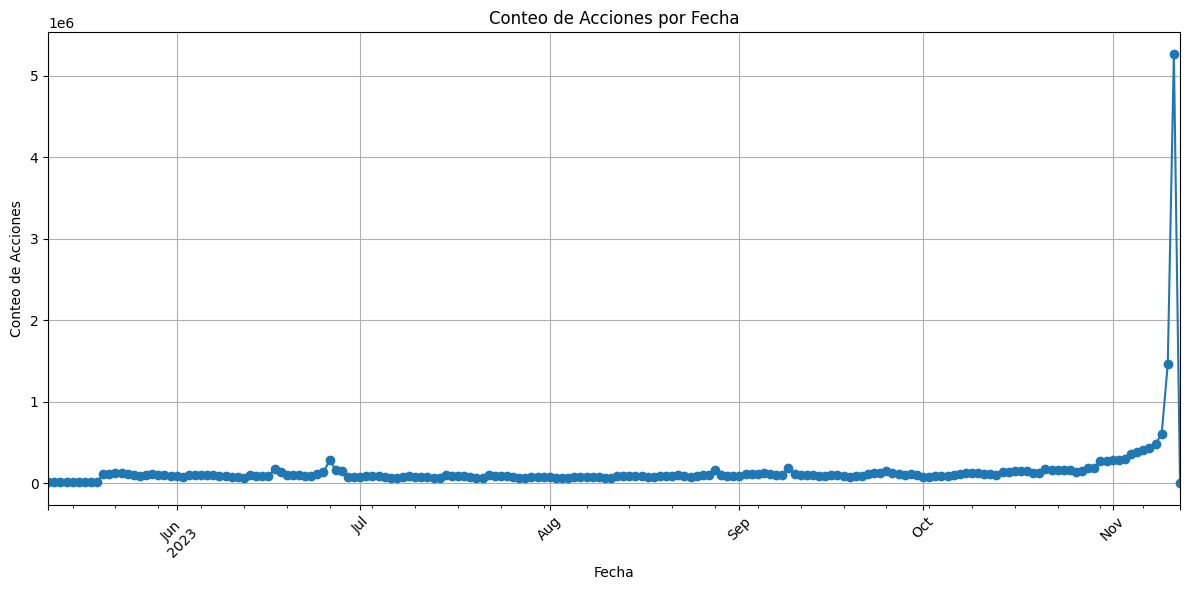

In [26]:
def convert_to_datetime(row):
    if isinstance(row, str):  # Verifica si el valor es una cadena
        dates = row.split(',')
        return pd.to_datetime([f'2023-{date[:2]}-{date[2:]}' for date in dates if date.isdigit()], errors='coerce')
    return pd.NaT  # Devuelve NaT para valores no válidos

dataTrain_activity_clean['time_stamp'] = dataTrain_activity_clean['time_stamp'].apply(convert_to_datetime)
exploded_df = dataTrain_activity_clean.explode('time_stamp')
date_counts = exploded_df['time_stamp'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
date_counts.plot(kind='line', marker='o')
plt.title('Conteo de Acciones por Fecha')
plt.xlabel('Fecha')
plt.ylabel('Conteo de Acciones')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()


En la distribución de label se puede apreciar que la mayor parte de ellos tienen valor -1 lo cual nos dice que los usuarios no son nuevos para el comerciante pero tampoco recurrentes como para ser valor 1. Luego una minoría son valor 0, lo que nos dice que no son compradores repetidos para un comerciante, y luego tenemos casi nula cantidad de 1, diciendonos que casi nadie es comprador recurrente.

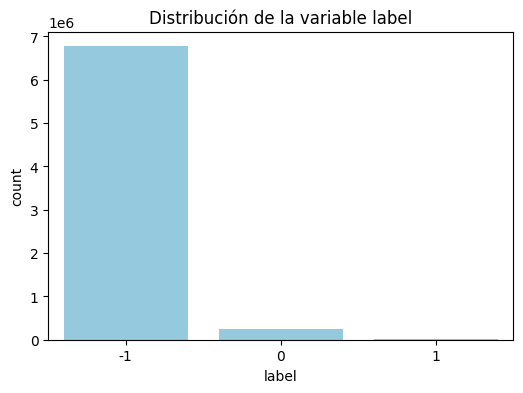

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x='label', data=dataTrain, color='skyblue')
plt.title('Distribución de la variable label')
plt.show()


<Figure size 1000x600 with 0 Axes>

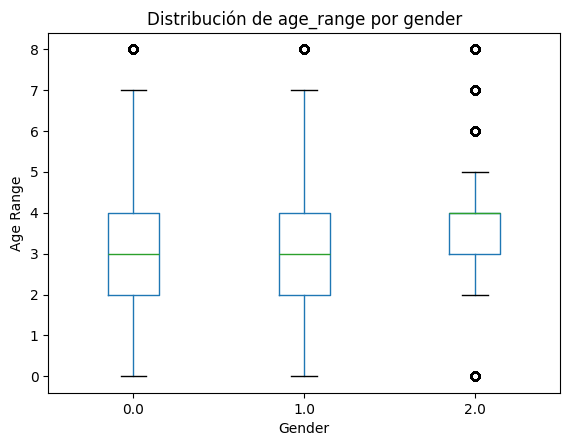

In [11]:
plt.figure(figsize=(10,6))
dataTrain_activity_clean.boxplot(column='age_range', by='gender', grid=False)
plt.title('Distribución de age_range por gender')
plt.suptitle('')  
plt.xlabel('Gender')
plt.ylabel('Age Range')
plt.show()

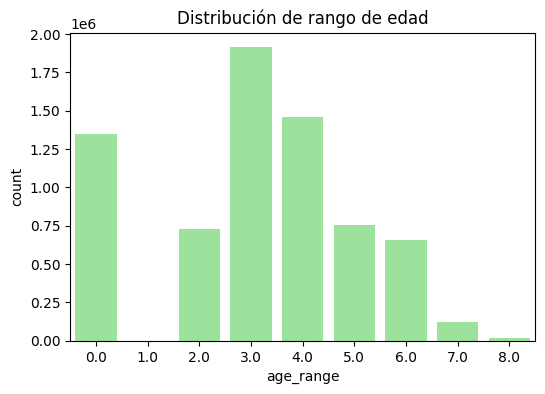

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(x='age_range', data=dataTrain, color='lightgreen')
plt.title('Distribución de rango de edad')
plt.show()


Con la edad podemos ver que en su mayoría se encuentran usuarios entre 25 y 29 años, luego siguen los usuarios entre 30 y 34, después los usuarios menores de 18 años. Luego se encuentran casi juntos los usuarios entre 35 y 39, de 18 a 24 y de 40 a 49. Siendo como minoría los mayores de 50 años.

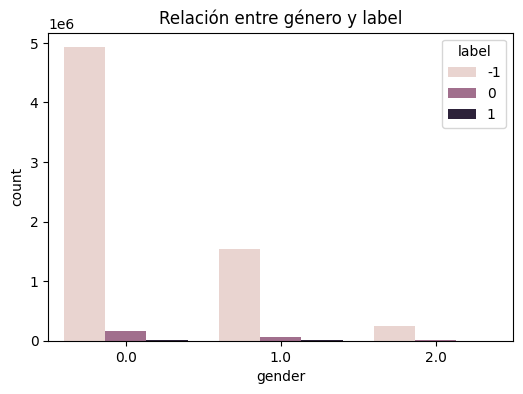

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(x='gender', hue='label', data=dataTrain)
plt.title('Relación entre género y label')
plt.show()


Podemos ver que en la relación entre label y género entre cada uno siempre predomina el label -1 pero en su mayoría se puede ver que lo conforman personas del género femenino, así como tambien la mayoría de los pocos 0 que hay son emeninos también.

<Figure size 1000x600 with 0 Axes>

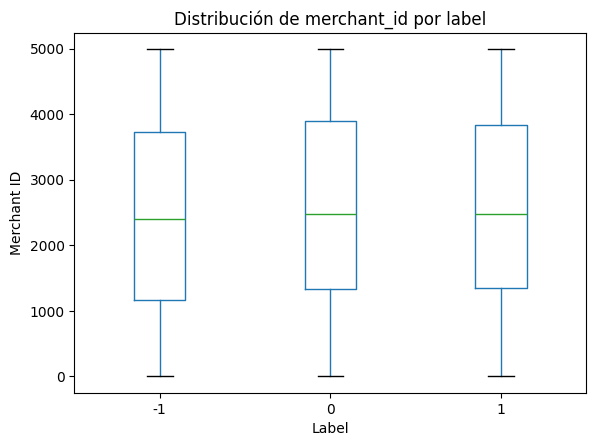

In [14]:
# Boxplot de 'merchant_id' por 'label' (si hay pocos merchant_id)
plt.figure(figsize=(10,6))
dataTrain_activity_clean.boxplot(column='merchant_id', by='label', grid=False)
plt.title('Distribución de merchant_id por label')
plt.suptitle('')
plt.xlabel('Label')
plt.ylabel('Merchant ID')
plt.show()

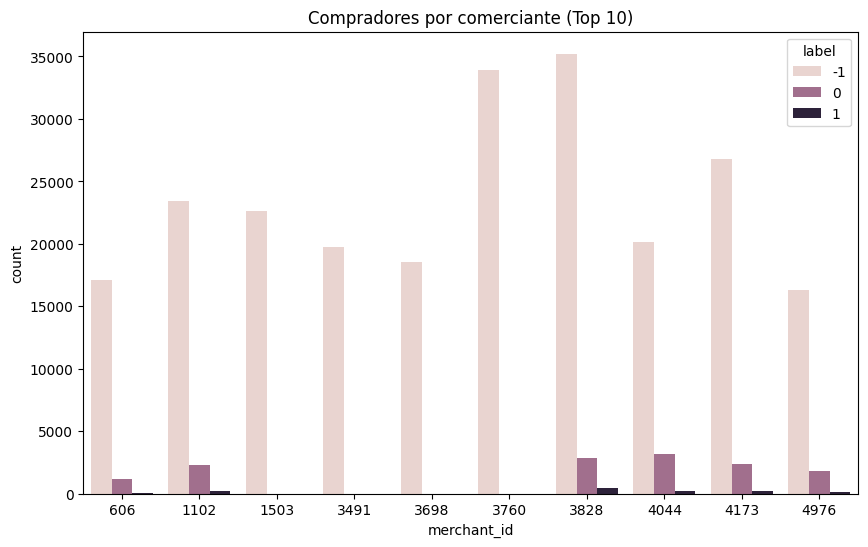

In [15]:
plt.figure(figsize=(10,6))
top_merchants = dataTrain['merchant_id'].value_counts().nlargest(10).index
sns.countplot(x='merchant_id', hue='label', data=dataTrain[dataTrain['merchant_id'].isin(top_merchants)])
plt.title('Compradores por comerciante (Top 10)')
plt.show()


Luego con el top 10 de comerciantes con mayores compradores, podemos ver que el comerciante con más compradores tiene label -1 es decir no son tan recurrentes tiene una minoría de compradores no repetidos y menos aún compradores recurrentes. Luego podemos ver que no todos los comerciantes tienen compradores recurrentes y a pesar de eso tienen buena cantidad de compradores tal vez no recurrentes pero si repetidos.

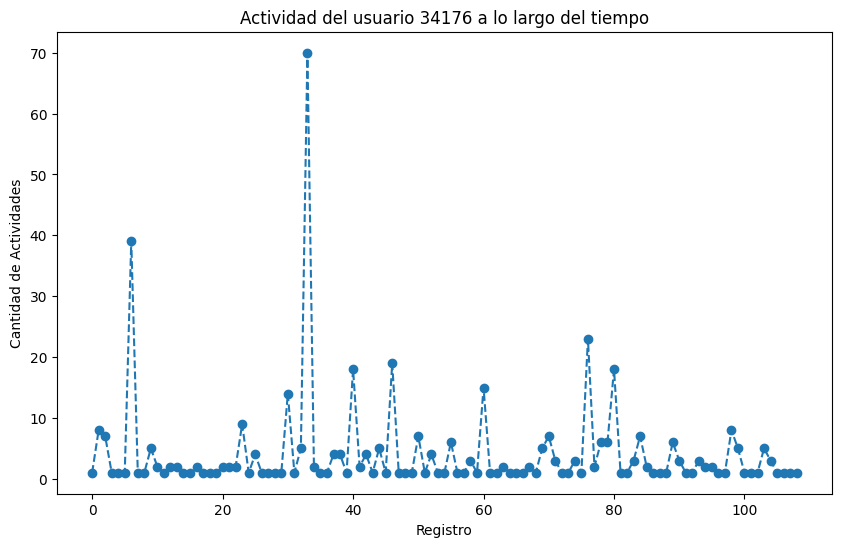

In [16]:
# Visualizar las actividades de un usuario específico
user_sample = dataTrain[dataTrain['user_id'] == 34176].copy() 

# Calcular la cantidad de actividades para cada registro
user_sample['activity_count'] = user_sample['activity_log'].apply(lambda x: len(str(x).split('#')))

# Muestra las actividades de este usuario a lo largo del tiempo
plt.figure(figsize=(10,6))
plt.plot(user_sample.index, user_sample['activity_count'], marker='o', linestyle='--')
plt.title(f'Actividad del usuario {34176} a lo largo del tiempo')
plt.xlabel('Registro')
plt.ylabel('Cantidad de Actividades')
plt.show()


Por último en esta gráfica podemos ver la actividad de algún usuario en específico. Esto quiere decir que a lo largo del tiempo se puede ver la actividad de un usuario como compras, agregar a favorito o al carrito, dar clic a un producto etc.